Import the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection & Processing


In [ ]:
# loading the data from csv file to a Pandas DataFrame
# read_csv function will help us to load the data from cs file to pandas data frame
calories = pd.read_csv('/content/drive/MyDrive/OOP Lab Project (Calories Burnt Prediction using ML)/calories.csv')

In [ ]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/drive/MyDrive/OOP Lab Project (Calories Burnt Prediction using ML)/exercise.csv')

In [ ]:
# print the first 5 rows of the dataframe
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [ ]:
# In pandas 1 referes column and 0 refres row
calories_data = pd.concat([exercise_data, calories['Calories']], axis = 1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# Checking the number of rows and colums
calories_data.shape

(15000, 9)

In [ ]:
# getting some informations about the data
# Null values means missing value and NO-null value means values that are present in the data set
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# Checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [ ]:
# get some statistical measured about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [ ]:
# sns.set will give us some theme for our plot. For example grid lines in our plos and the background theme
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


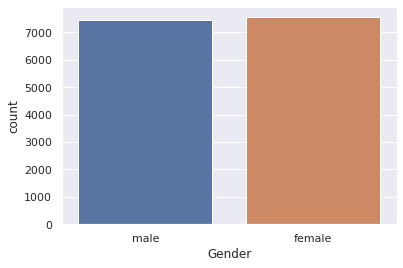

In [ ]:
# plotting the Gender column in count plot
# categorical column which are male and female. that's why we can plot categorical columns in count plot

sns.countplot(calories_data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


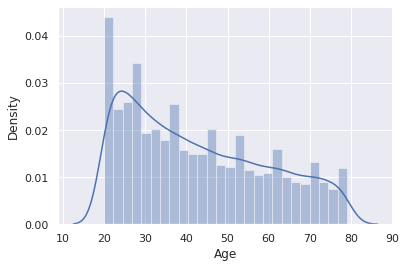

In [ ]:
# Finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


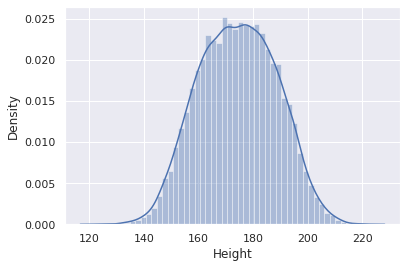

In [ ]:
# Finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


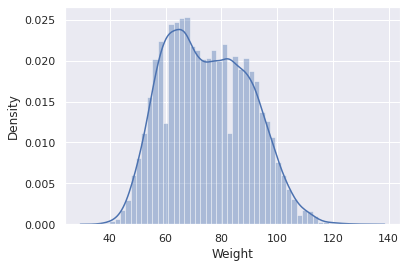

In [ ]:
# Finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


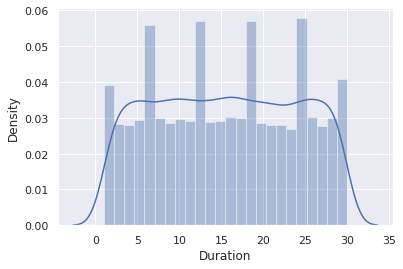

In [ ]:
# Finding the distribution of "Duration" column
sns.distplot(calories_data['Duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


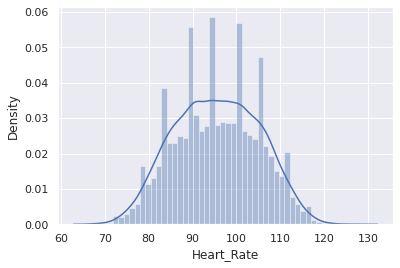

In [ ]:
# Finding the distribution of "Heart_Rate" column
sns.distplot(calories_data['Heart_Rate'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


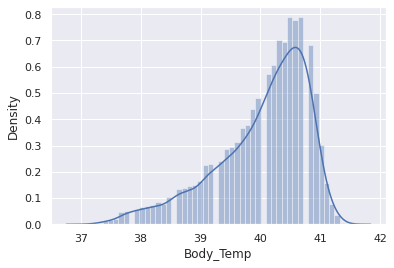

In [ ]:
# Finding the distribution of "Body_Temp" column
sns.distplot(calories_data['Body_Temp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


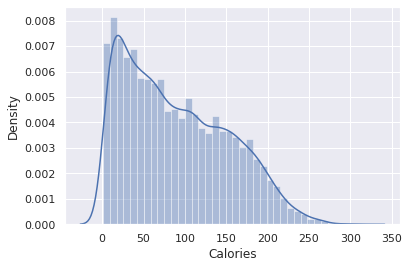

In [ ]:
# Finding the distribution of "Calories" column
sns.distplot(calories_data['Calories'])

Finding the Correlation in the dataset


1. Positive correlation
"Duration" and "Calories burnt" are increasing or decreasing at proportional rate. Means positively correlated
2. Negative correlation
It means if one feature is increased and other feature is decreased.


In [ ]:
correlation = calories_data.corr()

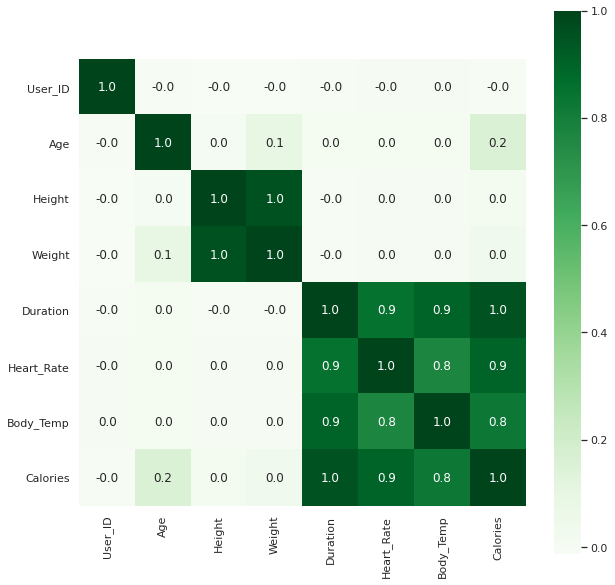

In [ ]:
# Constructing a heatmap to understand the correlation
# Heatmap gives colors based on the values
# Our main focus is (duration and calories) (heart_rate and calories) (Body-temp and calories)
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':12}, cmap='Greens')

Converting the text data to numerical values

In [ ]:
# This is a categorical data in coding.
# inplace = True means this changed will be carried thoughout the program.
calories_data.replace({"Gender":{'male':0,'female':1}},inplace=True)


In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [ ]:
# Drop function in pandas is used to drop some columns in the data frame
X = calories_data.drop(columns=['User_ID','Calories'],axis = 1)
Y = calories_data['Calories']


In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into Training and Test data 

In [ ]:
# 20% data is for test data and 80% data is for train data
# without random state data will be splitted in an automatic manner
# With random_state data will be splitted in specific manner.

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values.ravel(), test_size = 0.2, random_state = 42)

In [ ]:
#     original    train         test     -< Data
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training


Training XGBoost Regressor model

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X-train
model.fit(X_train, Y_train)

[07:32:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Evaluation

Prediction on training data

In [ ]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean absolute error

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("R squared error: ", score_1)
print("Mean Absolute Error: ", score_2)

R squared error:  0.9969932412950009
Mean Absolute Error:  2.4762374711036683


Prediction on Test Data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
# Now comparing with (Y_test) with ( test_data_prediction )
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)
# using metric called as mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [ ]:
print("R squared error: ", score_1)
print("Mean Absolute Error = ", score_2)

R squared error:  0.9969046593005394
Mean Absolute Error =  2.5638254485726355


*Compare* the Actual Calories and Predicted Calories in a Plot in testing

In [ ]:
# Converting pandas data frame to a list
Y_test = list(Y_test)

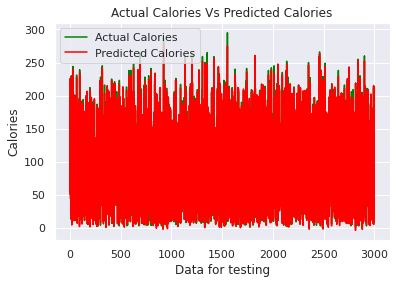

In [ ]:
plt.plot(Y_test, color = 'Green', label = 'Actual Calories')
plt.plot(test_data_prediction, color = 'Red', label = 'Predicted Calories')
plt.title('Actual Calories Vs Predicted Calories')
plt.xlabel('Data for testing')
plt.ylabel('Calories')
plt.legend()
plt.show()

Building a Predictive System

In [ ]:
#          Gender	 Age	 Height	  Weight	   Duration	   Heart_Rate	 Body_Temp	
input_data = (0,   68,   190.0,    94.0,      29.0,       105.0,       40.8)



# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

print("Calories burnt for this particular person: ", prediction[0])

[230.31734]
Calories burnt for this particular person:  230.31734
